## Follow-up on requests for food aid at 211
Montreal Follow-Up on Requests for Food Aid at 211 is a service of the City of Montreal's to address food insecurity and assist residents in accessing food aid. Managed in collaboration with 211 Greater Montreal, a comprehensive referral service, the program ensures that individuals and families in need can receive timely and appropriate assistance.
The dataset presents all requests (telephone, chat and email) made to 211 Greater Montreal that are related to food in 2021 and 2022 as part of the food insecurity project funded by the City of Montreal 

The data is provided as csv. 

### Steps that are taken
- Load the csv file containing requests data and perform some analysis on the data
- Load the csv file containing follow-up data data and perform some analysis on the data
- Load the csv file containing needs / requirements data data and perform some analysis on the data
- Load the shapefile containing business data and perform some analysis on the data

### Data source
- https://donnees.Montreal.ca/dataset/demandes-aide-alimentaire
- Source: Open Data Portal Montreal
- Publisher: 211 Greater Montreal
- Accessed: 12.11.2023

- https://donnees.montreal.ca/dataset/etablissements-alimentaires
- Source: City of Montréal
- Accessed: 12.11.2023

In [1]:
# Importing required libraries for geospatial analysis, data manipulation, and visualization.
import os
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress warnings for better readability of the output
import warnings
warnings.filterwarnings('ignore')

In [2]:
print("Current working directory:", os.getcwd())

Current working directory: /home/jovyan/work/Z_FINAL_Food_aid_request


In [3]:
# Ensure the "Figures" directory exists
output_folder = "Figures"
os.makedirs(output_folder, exist_ok=True)

In [4]:
# Define the folder path (you can use an absolute or relative path)
folder_path = "/home/jovyan/work/Data/"

# Set the environment variable, for example 'MY_FOLDER'
os.environ["Data_folder"] = folder_path

# You can verify it's set by printing it
print("Environment variable Data_folder is set to:", os.environ["Data_folder"])

Environment variable Data_folder is set to: /home/jovyan/work/Data/


In [5]:
# Get the folder path from the environment variable
folder_path = os.environ.get("Data_folder")
if not folder_path:
    raise ValueError("The environment variable Data_folder is not set.")

In [6]:
# Load the shapefile containing business data
file_path = os.path.join(folder_path, "Food_establishments/businesses.shp")
food_establishments = gpd.read_file(file_path)
food_establishments.head(3)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,business_i,name,address,city,state,type,statut,date_statu,latitude,longitude,x,y,geometry
0,127,LES ENTREPRISES ALJO,12515 Boulevard Rodolphe-Forget,Montréal,"Québec, Canada",Distributrice automatique,Ouvert,20031123,45.650661,-73.580264,298544.13,5056754.99,POINT (298544.130 5056754.990)
1,135,PROVI-TOT,9128 Boulevard Perras,Montréal,"Québec, Canada",Épicerie avec préparation,Fermé changement d'exploitant,20090821,45.650352,-73.577726,298741.88,5056720.54,POINT (298741.880 5056720.540)
2,138,LE PETIT TABLIER,690 Rue Sherbrooke Ouest,Montréal,"Québec, Canada",Restaurant,Fermé changement d'exploitant,20090306,45.504673,-73.57376600000001,299035.65,5040530.65,POINT (299035.650 5040530.650)


In [7]:
# Load shapefile containing borough data
file_path = os.path.join(folder_path, "Administrative_boundaries/limites-administratives-agglomeration.shp")
boroughs = gpd.read_file(file_path)
# Display the first few rows of the boroughs data
boroughs.head(3)

,CODEID,NOM,CODEMAMH,NUM,ABREV,TYPE,COMMENT,DATEMODIF,geometry
0,10,LaSalle,REM17,18,LS,Arrondissement,NaN,2023-11-29,"POLYGON ((-73.66610 45.42180, -73.66601 45.428..."
1,3,Dollard-des-Ormeaux,66142,11,DO,Ville liée,NaN,2023-11-29,"POLYGON ((-73.84655 45.46257, -73.84854 45.464..."
2,27,Côte-Saint-Luc,66058,72,CL,Ville liée,NaN,2023-11-29,"MULTIPOLYGON (((-73.68281 45.46318, -73.68162 ..."


In [8]:
# # Load shapefile containing borough data including age
# boroughs_age = gpd.read_file('Data/merged_data_with_age_geom.shp')

# # Display the first few rows of the boroughs data including age
# boroughs_age.head(5)

# Load shapefile containing borough data including age
file_path = os.path.join(folder_path, "Food_aid_requests/merged_data_with_age_geom.shp")
boroughs_age = gpd.read_file(file_path)
# Display the first few rows of the boroughs data including age
boroughs_age.head(3)

,NOM,Number_of_,Area_km2,Weighted_C,Number_o_1,Incidents_,without_re,count,Age,geometry
0,Mercier-Hochelaga-Maisonneuve,1276,27.397994,46.572753,960.0,1.329167,NaN,769.0,46.0,"POLYGON ((611553.115 5050223.963, 611575.051 5..."
1,Rosemont-La Petite-Patrie,1122,15.880220,70.653935,1195.0,0.938912,NaN,873.0,50.0,"POLYGON ((610254.244 5046844.882, 610345.760 5..."
2,Montréal-Nord,1084,12.459161,87.004251,334.0,3.245509,NaN,288.0,43.0,"POLYGON ((608917.076 5051791.226, 608914.518 5..."


In [9]:
# Load language translation data and categories for food establishments types
# You can change the categories of the buisnesses by editting the Excel file
file_path = os.path.join(folder_path, "Food_establishments/Buisnesses_types_frensch_english_german.xlsx")
food_establishments_language = pd.read_excel(file_path)

# Drop not needed cloumns
food_establishments_language.drop(['German','Notes', 'Link'], axis=1, inplace=True)

# Display the first few rows of the dataframe food_establishments to understand its structure.
food_establishments_language.head(5)

,French,English,healthy_food_store,supermarket,fast_food_outlet,restaurant,out_of_home_catering,other
0,Distributrice automatique,Automatic vending machine,NaN,NaN,NaN,NaN,NaN,1.0
1,Épicerie avec préparation,Grocery with preparation,NaN,1.0,NaN,NaN,NaN,NaN
2,Restaurant,Restaurant,NaN,NaN,NaN,1.0,NaN,NaN
3,Brasserie,Brasserie,NaN,NaN,NaN,1.0,NaN,NaN
4,"Bar salon, taverne","Lounge bar, tavern",NaN,NaN,NaN,1.0,NaN,NaN


In [10]:
# Merge food establishments data with language translations using the 'type' and 'French' columns
merged_food_establishments = food_establishments.merge(food_establishments_language, left_on='type', right_on='French',copy = False)
# Display the first few rows of the dataframe merged food establishments to understand its structure.
merged_food_establishments.head(5)

,business_i,name,address,city,state,type,statut,date_statu,latitude,longitude,...,y,geometry,French,English,healthy_food_store,supermarket,fast_food_outlet,restaurant,out_of_home_catering,other
0,127,LES ENTREPRISES ALJO,12515 Boulevard Rodolphe-Forget,Montréal,"Québec, Canada",Distributrice automatique,Ouvert,20031123,45.650661,-73.580264,...,5056754.99,POINT (298544.130 5056754.990),Distributrice automatique,Automatic vending machine,NaN,NaN,NaN,NaN,NaN,1.0
1,509,DIST. SERVI-VEND INC(INDUS.MAJESTIC INC.,3700 Rue Jean-Rivard,Montréal,"Québec, Canada",Distributrice automatique,Fermé,20150319,45.57109,-73.610179,...,5047914.87,POINT (296200.350 5047914.870),Distributrice automatique,Automatic vending machine,NaN,NaN,NaN,NaN,NaN,1.0
2,792,PAUSE CAFE TRIO,8699 Boulevard Saint-Michel,Montréal,"Québec, Canada",Distributrice automatique,Fermé changement d'exploitant,20090603,45.568991,-73.62122100000001,...,5047682.88,POINT (295338.100 5047682.880),Distributrice automatique,Automatic vending machine,NaN,NaN,NaN,NaN,NaN,1.0
3,993,GO CAFE (C.H.S.L.D. EMILIE-GAMELIN),1440 Rue Dufresne,Montréal,"Québec, Canada",Distributrice automatique,Fermé,20110419,45.528664,-73.54790800000001,...,5043195.19,POINT (301057.850 5043195.190),Distributrice automatique,Automatic vending machine,NaN,NaN,NaN,NaN,NaN,1.0
4,2466,PAUSE CAFE TRIO (T. LAUZON),2715 Rue Reading,Montréal,"Québec, Canada",Distributrice automatique,Fermé,20171016,45.475019,-73.56746200000001,...,5037234.72,POINT (299525.480 5037234.720),Distributrice automatique,Automatic vending machine,NaN,NaN,NaN,NaN,NaN,1.0


In [11]:
# Retrieve unique English translations of food establishments types
merged_food_establishments_unique = merged_food_establishments['English'].unique()
# print(merged_food_establishmentss_unique)

In [12]:
# Print the shape of the merged GeoDataFrame
merged_food_establishments.shape

(26626, 21)

In [13]:
# Print the shape of the original food establishments GeoDataFrame
food_establishments.shape

(26646, 13)

In [14]:
# Group the merged food establishments data by type and display unique French and English names
with pd.option_context('display.max_rows', None):
    unique_values = merged_food_establishments.groupby('type')[['French', 'English']].agg(lambda x: x.unique())
#    print(unique_values)

In [15]:
# Define a function to categorize food establishments based on predefined binary columns
def find_category(row):
    categories = ['healthy_food_store', 'supermarket', 'fast_food_outlet', 'restaurant', 'out_of_home_catering', 'other']
    for category in categories:
        if row[category] == 1:
            return category
    return 'None'  # Or any other value if no column has a 1

# Apply the function to each row
merged_food_establishments['category'] = merged_food_establishments.apply(find_category, axis=1)

# Now you can remove the old columns if they are no longer needed
merged_food_establishments.drop(['healthy_food_store', 'supermarket', 'fast_food_outlet', 'restaurant', 'out_of_home_catering', 'other'], axis=1, inplace=True)

# Display the first few rows of the dataframe merged food establishments to understand its structure.
merged_food_establishments.head(5)

,business_i,name,address,city,state,type,statut,date_statu,latitude,longitude,x,y,geometry,French,English,category
0,127,LES ENTREPRISES ALJO,12515 Boulevard Rodolphe-Forget,Montréal,"Québec, Canada",Distributrice automatique,Ouvert,20031123,45.650661,-73.580264,298544.13,5056754.99,POINT (298544.130 5056754.990),Distributrice automatique,Automatic vending machine,other
1,509,DIST. SERVI-VEND INC(INDUS.MAJESTIC INC.,3700 Rue Jean-Rivard,Montréal,"Québec, Canada",Distributrice automatique,Fermé,20150319,45.57109,-73.610179,296200.35,5047914.87,POINT (296200.350 5047914.870),Distributrice automatique,Automatic vending machine,other
2,792,PAUSE CAFE TRIO,8699 Boulevard Saint-Michel,Montréal,"Québec, Canada",Distributrice automatique,Fermé changement d'exploitant,20090603,45.568991,-73.62122100000001,295338.10,5047682.88,POINT (295338.100 5047682.880),Distributrice automatique,Automatic vending machine,other
3,993,GO CAFE (C.H.S.L.D. EMILIE-GAMELIN),1440 Rue Dufresne,Montréal,"Québec, Canada",Distributrice automatique,Fermé,20110419,45.528664,-73.54790800000001,301057.85,5043195.19,POINT (301057.850 5043195.190),Distributrice automatique,Automatic vending machine,other
4,2466,PAUSE CAFE TRIO (T. LAUZON),2715 Rue Reading,Montréal,"Québec, Canada",Distributrice automatique,Fermé,20171016,45.475019,-73.56746200000001,299525.48,5037234.72,POINT (299525.480 5037234.720),Distributrice automatique,Automatic vending machine,other


In [16]:
unique_food_establishments_merged = merged_food_establishments['category'].unique()
# print(unique_food_establishments_merged)

In [17]:
# Dictionary for mapping original category names to desired names
category_mapping = {
    'other': 'Other',
    'healthy_food_store': 'Healthy Food Store',
    'restaurant': 'Restaurant',
    'supermarket': 'Supermarket',
    'out_of_home_catering': 'Out of Home Catering',
    'fast_food_outlet': 'Fast Food Outlet'
}

# Replacing values in the "category" column using the replace method
merged_food_establishments['category'] = merged_food_establishments['category'].replace(category_mapping)

merged_food_establishments.head(5)

,business_i,name,address,city,state,type,statut,date_statu,latitude,longitude,x,y,geometry,French,English,category
0,127,LES ENTREPRISES ALJO,12515 Boulevard Rodolphe-Forget,Montréal,"Québec, Canada",Distributrice automatique,Ouvert,20031123,45.650661,-73.580264,298544.13,5056754.99,POINT (298544.130 5056754.990),Distributrice automatique,Automatic vending machine,Other
1,509,DIST. SERVI-VEND INC(INDUS.MAJESTIC INC.,3700 Rue Jean-Rivard,Montréal,"Québec, Canada",Distributrice automatique,Fermé,20150319,45.57109,-73.610179,296200.35,5047914.87,POINT (296200.350 5047914.870),Distributrice automatique,Automatic vending machine,Other
2,792,PAUSE CAFE TRIO,8699 Boulevard Saint-Michel,Montréal,"Québec, Canada",Distributrice automatique,Fermé changement d'exploitant,20090603,45.568991,-73.62122100000001,295338.10,5047682.88,POINT (295338.100 5047682.880),Distributrice automatique,Automatic vending machine,Other
3,993,GO CAFE (C.H.S.L.D. EMILIE-GAMELIN),1440 Rue Dufresne,Montréal,"Québec, Canada",Distributrice automatique,Fermé,20110419,45.528664,-73.54790800000001,301057.85,5043195.19,POINT (301057.850 5043195.190),Distributrice automatique,Automatic vending machine,Other
4,2466,PAUSE CAFE TRIO (T. LAUZON),2715 Rue Reading,Montréal,"Québec, Canada",Distributrice automatique,Fermé,20171016,45.475019,-73.56746200000001,299525.48,5037234.72,POINT (299525.480 5037234.720),Distributrice automatique,Automatic vending machine,Other


In [18]:
# Filter rows for food_establishments categorized as 'Supermarket'
# filtered_rows = merged_food_establishments[merged_food_establishments['category'].isin(['Supermarket'])]
#print(filtered_rows)

In [19]:
# Retrieve unique English names for food_establishments in the 'Healthy Food Store' category
supermarket_english_categories = merged_food_establishments.loc[merged_food_establishments['category'] == 'Healthy Food Store', 'English']
unique_supermarket_categories = supermarket_english_categories.unique()
print(unique_supermarket_categories)

['Butchery and grocery' 'Bakery' 'Fishmonger' 'Delicatessen/cheese'
 'Butchers' 'Delicatessen']


In [20]:
# Retrieve unique English names for food_establishments in the 'Supermarket' category
supermarket_english_categories = merged_food_establishments.loc[merged_food_establishments['category'] == 'Supermarket', 'English']
unique_supermarket_categories = supermarket_english_categories.unique()
print(unique_supermarket_categories)

['Grocery with preparation' 'Supermarket' 'Grocery store']


In [21]:
# Filter the 'merged_food_establishments' DataFrame to include only rows where the 'statut' column has the value 'Ouvert'
# This likely represents food_establishments that are currently open.
# open_merged_food_establishments = merged_food_establishments[merged_food_establishments['statut'] == 'Ouvert']
open_merged_food_establishments = merged_food_establishments[merged_food_establishments['statut'].isin(["Ouvert", "Fermé changement d'exploitant", "En traitement", "Sous inspection fédérale"])]

# Display the first 5 rows of the filtered DataFrame to verify the result
open_merged_food_establishments.head(5)


,business_i,name,address,city,state,type,statut,date_statu,latitude,longitude,x,y,geometry,French,English,category
0,127,LES ENTREPRISES ALJO,12515 Boulevard Rodolphe-Forget,Montréal,"Québec, Canada",Distributrice automatique,Ouvert,20031123,45.650661,-73.580264,298544.13,5056754.99,POINT (298544.130 5056754.990),Distributrice automatique,Automatic vending machine,Other
2,792,PAUSE CAFE TRIO,8699 Boulevard Saint-Michel,Montréal,"Québec, Canada",Distributrice automatique,Fermé changement d'exploitant,20090603,45.568991,-73.62122100000001,295338.10,5047682.88,POINT (295338.100 5047682.880),Distributrice automatique,Automatic vending machine,Other
9,2509,SELECTION PLUS (JOURNAL DE MONTREAL),4545 Rue Frontenac,Montréal,"Québec, Canada",Distributrice automatique,Fermé changement d'exploitant,20100616,45.539253,-73.568121,299480.01,5044373.18,POINT (299480.010 5044373.180),Distributrice automatique,Automatic vending machine,Other
11,2628,QUEBEC LINGE (GO CAFE),4375 53 Rue Rouen,Montréal,"Québec, Canada",Distributrice automatique,Fermé changement d'exploitant,20221107,45.554382,-73.542891,301451.25,5046053.07,POINT (301451.250 5046053.070),Distributrice automatique,Automatic vending machine,Other
12,3767,PAVILLON J-HENRI CHARBONNEAU,3095 Rue Sherbrooke Est,Montréal,"Québec, Canada",Distributrice automatique,Ouvert,20070112,45.542513,-73.55783599999999,300283.49,5044734.77,POINT (300283.490 5044734.770),Distributrice automatique,Automatic vending machine,Other


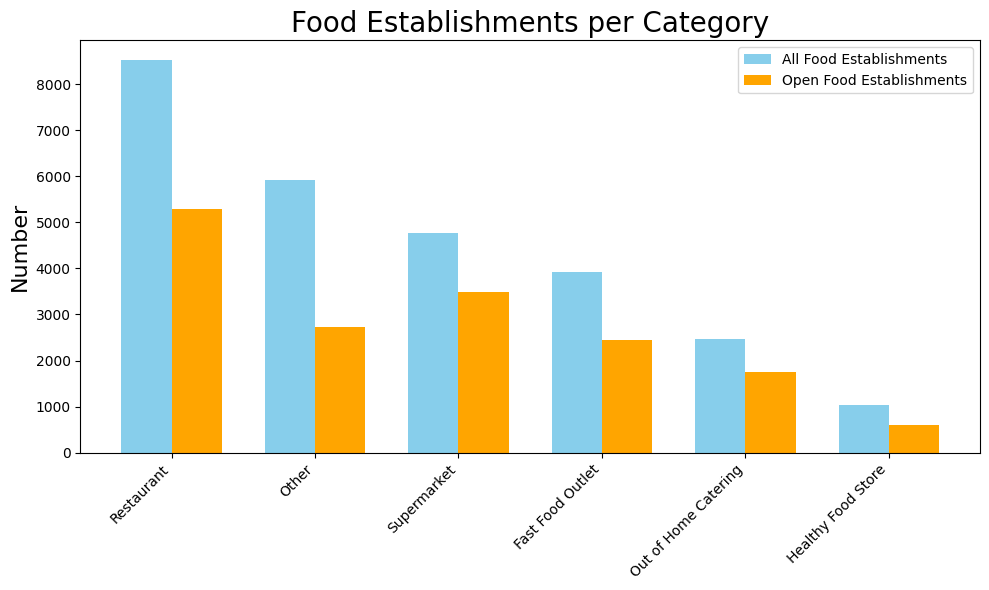

In [22]:
# Data preparation
merged_counts = merged_food_establishments['category'].value_counts()
open_counts = open_merged_food_establishments['category'].value_counts()

# Ensure both datasets have the same index (categories)
categories = merged_counts.index.union(open_counts.index)
merged_counts = merged_counts.reindex(categories, fill_value=0)
open_counts = open_counts.reindex(categories, fill_value=0)

# Sort data in decreasing order of merged_counts
sorted_indices = merged_counts.sort_values(ascending=False).index
merged_counts = merged_counts[sorted_indices]
open_counts = open_counts[sorted_indices]

# Bar positions
x = np.arange(len(sorted_indices))  # the label locations
width = 0.35  # width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, merged_counts, width, label='All Food Establishments', color='skyblue')
bar2 = ax.bar(x + width/2, open_counts, width, label='Open Food Establishments', color='orange')

# Add labels, title, and legend
ax.set_title('Food Establishments per Category', size=20)
ax.set_ylabel('Number', size=16)
ax.set_xticks(x)
ax.set_xticklabels(sorted_indices, rotation=45, ha='right')
ax.legend()

# Save and show the plot
plt.tight_layout()
# Save the figure in the "Figures" folder
output_path = os.path.join(output_folder, 'Number_of_food_establishments_per_category.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

In [23]:
# Convert the coordinate reference system (CRS) of the 'merged_food_establishments' GeoDataFrame to WGS84 (EPSG:4326)
merged_food_establishments_crs = open_merged_food_establishments.to_crs(epsg=4326)

# Perform a spatial join between the transformed 'merged_food_establishments_crs' and 'boroughs' GeoDataFrame.
# The join keeps only the rows where geometries in 'merged_food_establishments_crs' are within the geometries in 'boroughs'.
# The result is stored in 'open_merged_food_establishments_boroughs'.
open_merged_food_establishments_boroughs = gpd.sjoin(
    merged_food_establishments_crs, 
    boroughs, 
    how="inner", 
    predicate="within"
)

open_merged_food_establishments_boroughs.head(3)

,business_i,name,address,city,state,type,statut,date_statu,latitude,longitude,...,category,index_right,CODEID,NOM,CODEMAMH,NUM,ABREV,TYPE,COMMENT,DATEMODIF
0,127,LES ENTREPRISES ALJO,12515 Boulevard Rodolphe-Forget,Montréal,"Québec, Canada",Distributrice automatique,Ouvert,20031123,45.650661,-73.580264,...,Other,27,11,Rivière-des-Prairies-Pointe-aux-Trembles,REM33,19,RP,Arrondissement,NaN,2023-11-29
134,3084,LA MAISON DES JEUNES DE RIVIERE-DES-PRAIRIES,12550 Avenue 48e,Rivière-des-Prairies,"Québec, Canada",Distributrice automatique,Ouvert,20020911,45.652421,-73.577274,...,Other,27,11,Rivière-des-Prairies-Pointe-aux-Trembles,REM33,19,RP,Arrondissement,NaN,2023-11-29
167,3959,CENTRE PAUL GRATTON,11865 Rue De Montigny,Montréal,"Québec, Canada",Distributrice automatique,Ouvert,20040324,45.640147,-73.50671,...,Other,27,11,Rivière-des-Prairies-Pointe-aux-Trembles,REM33,19,RP,Arrondissement,NaN,2023-11-29


In [24]:
# Group the 'open_merged_food_establishments_boroughs' GeoDataFrame by borough name ('NOM') and food establishments category ('category').
# Calculate the count of food establishments for each combination of borough and category.
open_food_establishments_count_by_borough = open_merged_food_establishments_boroughs.groupby(
    ['NOM', 'category']
).size()  # Compute the size (count) of each group.

# Reshape the grouped data to a table where:
# - Rows represent boroughs ('NOM').
# - Columns represent food establishments categories ('category').
# - Cell values represent the count of food_establishments in each category per borough.
# Missing values are filled with 0 using `fill_value=0`.
open_food_establishments_count_by_borough = open_food_establishments_count_by_borough.unstack(fill_value=0)

# Display the first 5 rows of the resulting DataFrame to inspect the output.
open_food_establishments_count_by_borough.head(5)

category,Fast Food Outlet,Healthy Food Store,Other,Out of Home Catering,Restaurant,Supermarket
NOM,,,,,,
Ahuntsic-Cartierville,100,32,180,135,234,216
Anjou,39,7,53,25,39,34
Baie-D'Urfé,0,0,50,4,1,0
Beaconsfield,1,0,8,12,7,8
Côte-Saint-Luc,13,6,11,11,5,9


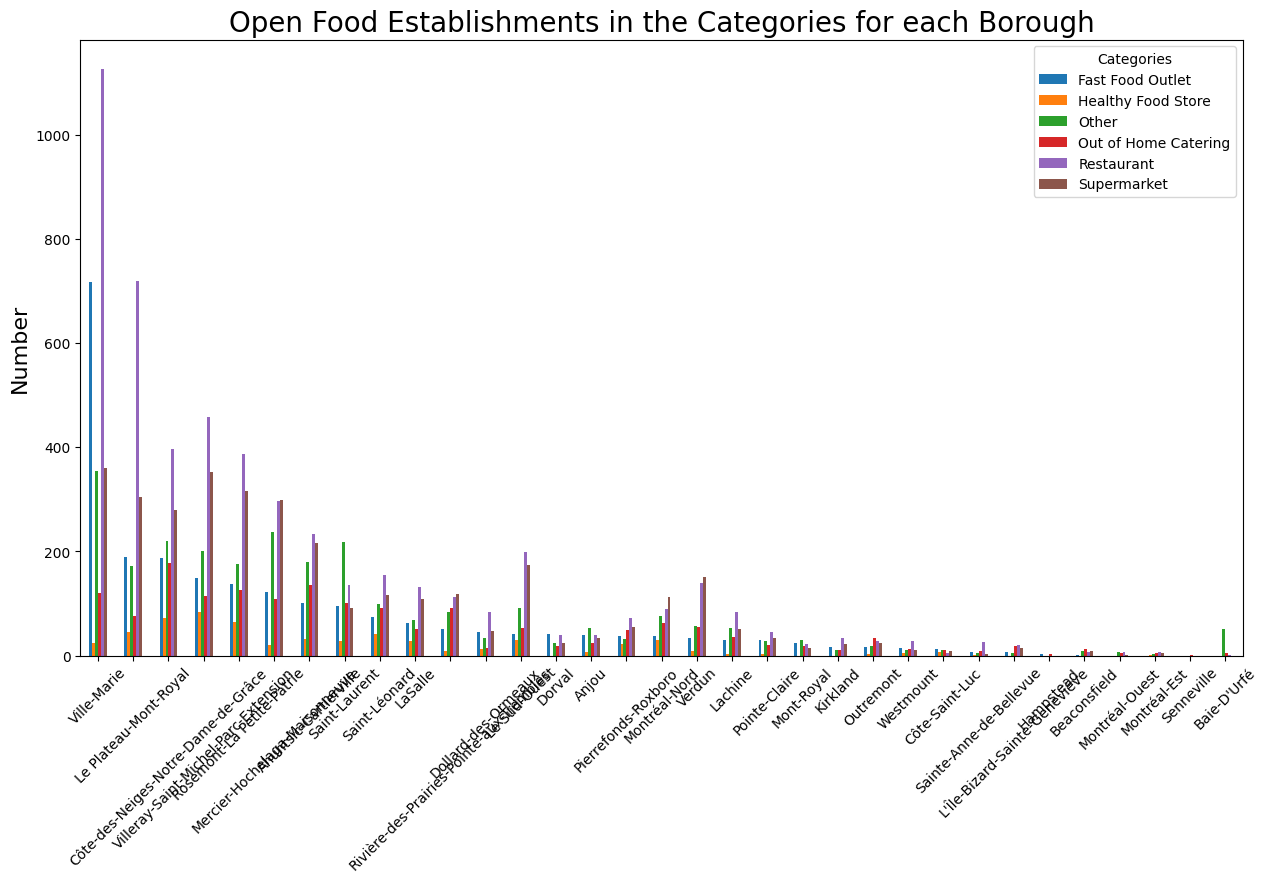

In [25]:
# Sort the DataFrame in descending order
open_food_establishments_count_by_borough = open_food_establishments_count_by_borough.sort_values(by=open_food_establishments_count_by_borough.columns[0], ascending=False)

# Plot the number of food_establishments by borough and category as a bar chart
open_food_establishments_count_by_borough.plot(kind='bar', figsize=(15, 8))
# , width=0.8)
plt.title('Open Food Establishments in the Categories for each Borough', size=20)
plt.xlabel('')
plt.ylabel('Number', size=16)

# Rotate and set the labels on the x-axis with smaller font size
borough_names = open_food_establishments_count_by_borough.index.tolist()
plt.xticks(range(len(borough_names)), borough_names, rotation=45, fontsize=10)  # Adjust fontsize as needed
plt.legend(title='Categories', fontsize=10)

# Save the figure in the "Figures" folder
output_path = os.path.join(output_folder, 'Number_of_food_establishments(open)_in_the_categories_for_each_borough.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

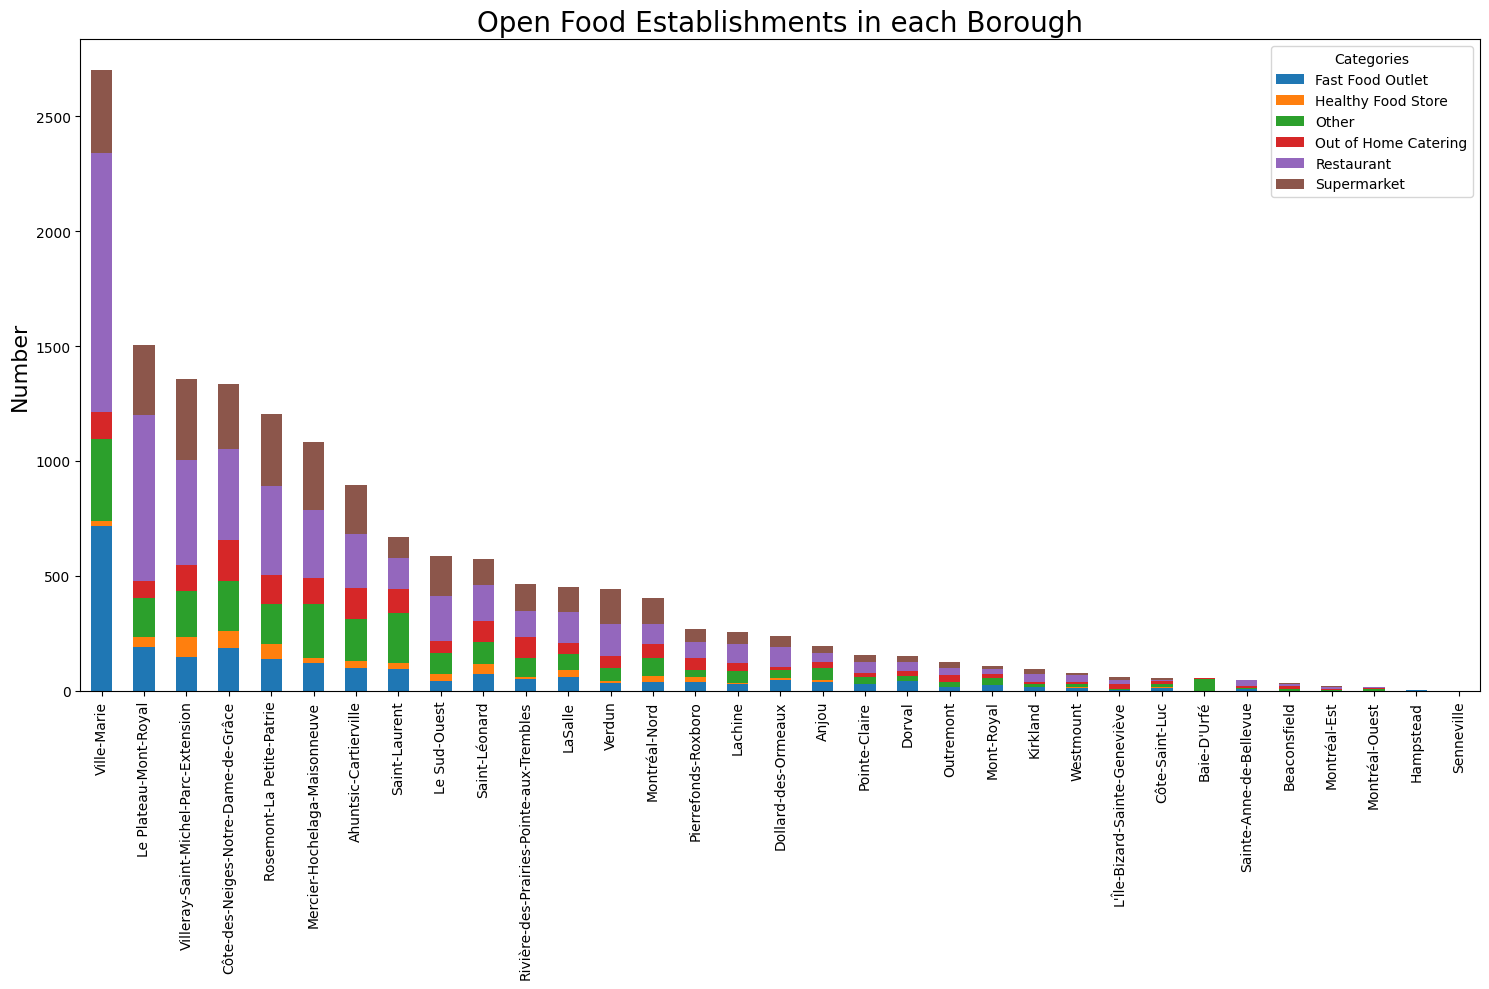

In [26]:
# Aggregation of number of food establishments by type of food establishments and borough
food_establishments_count_by_type_and_borough = open_merged_food_establishments_boroughs.groupby(['NOM', 'category']).size().unstack(fill_value=0)

# Calculate the total food establishments for each borough and sort by it
total_food_establishments_by_borough = food_establishments_count_by_type_and_borough.sum(axis=1)
food_establishments_count_by_type_and_borough = food_establishments_count_by_type_and_borough.loc[total_food_establishments_by_borough.sort_values(ascending=False).index]

# Plot the number and kind of food establishments in each borough
food_establishments_count_by_type_and_borough.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Open Food Establishments in each Borough', size=20)
plt.xlabel('')
plt.ylabel('Number', size=16)

# Adjust x-axis labels for readability
plt.xticks(rotation=90, fontsize=10)
plt.legend(title='Categories', fontsize=10)
# , bbox_to_anchor=(0.05, 1), loc='upper left')
plt.tight_layout()

# Save the figure in the "Figures" folder
output_path = os.path.join(output_folder, 'Number_of_food_establishments(open)_in_each_borough_stacked.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()

## !!!! Here we should check why two boroughs are disappearing !!!

### can we do the merge in two steps?

In [27]:
# Merge food establishments data with borough geospatial data
merged_data = open_food_establishments_count_by_borough.merge(
    boroughs_age[['NOM', 'geometry', 'Area_km2']],  # Select relevant columns
    on='NOM',  # Merge on borough name
    how='left'  # Left join to retain all food establishments data
)

# Display the first few rows of merged data
merged_data.head(5)

,NOM,Fast Food Outlet,Healthy Food Store,Other,Out of Home Catering,Restaurant,Supermarket,geometry,Area_km2
0,Ville-Marie,716,24,354,120,1126,359,"POLYGON ((610107.123 5041216.131, 610142.196 5...",21.493694
1,Le Plateau-Mont-Royal,189,45,171,75,719,305,"POLYGON ((610107.123 5041216.131, 610089.785 5...",8.141402
2,Côte-des-Neiges-Notre-Dame-de-Grâce,187,72,220,178,396,280,"POLYGON ((605952.669 5036497.951, 605996.868 5...",21.479610
3,Villeray-Saint-Michel-Parc-Extension,149,84,200,114,457,353,"POLYGON ((610254.244 5046844.882, 610318.924 5...",16.475024
4,Rosemont-La Petite-Patrie,138,65,175,125,387,315,"POLYGON ((610254.244 5046844.882, 610345.760 5...",15.880220


In [28]:
# Normalize food establishments types counts by borough area (restaurants per km²)
food_establishments_type = ['Fast Food Outlet', 'Healthy Food Store', 'Other', 'Out of Home Catering', 'Restaurant', 'Supermarket']
for food_establishments_type in food_establishments_type:
    merged_data[food_establishments_type + '_per_km2'] = merged_data[food_establishments_type] / merged_data['Area_km2']

# Display the updated dataset
merged_data.head(5)

,NOM,Fast Food Outlet,Healthy Food Store,Other,Out of Home Catering,Restaurant,Supermarket,geometry,Area_km2,Fast Food Outlet_per_km2,Healthy Food Store_per_km2,Other_per_km2,Out of Home Catering_per_km2,Restaurant_per_km2,Supermarket_per_km2
0,Ville-Marie,716,24,354,120,1126,359,"POLYGON ((610107.123 5041216.131, 610142.196 5...",21.493694,33.312095,1.116607,16.469947,5.583033,52.387457,16.702573
1,Le Plateau-Mont-Royal,189,45,171,75,719,305,"POLYGON ((610107.123 5041216.131, 610089.785 5...",8.141402,23.214675,5.527304,21.003754,9.212173,88.314029,37.462835
2,Côte-des-Neiges-Notre-Dame-de-Grâce,187,72,220,178,396,280,"POLYGON ((605952.669 5036497.951, 605996.868 5...",21.479610,8.705931,3.352016,10.242272,8.286929,18.436089,13.035618
3,Villeray-Saint-Michel-Parc-Extension,149,84,200,114,457,353,"POLYGON ((610254.244 5046844.882, 610318.924 5...",16.475024,9.043993,5.098627,12.139588,6.919565,27.738958,21.426373
4,Rosemont-La Petite-Patrie,138,65,175,125,387,315,"POLYGON ((610254.244 5046844.882, 610345.760 5...",15.880220,8.690056,4.093142,11.019999,7.871428,24.369940,19.835998


In [29]:
# Convert the merged data pandas into a geopandas GeoDataFrame for spatial operations
gdf = gpd.GeoDataFrame(merged_data, geometry='geometry')
gdf.head(5)

,NOM,Fast Food Outlet,Healthy Food Store,Other,Out of Home Catering,Restaurant,Supermarket,geometry,Area_km2,Fast Food Outlet_per_km2,Healthy Food Store_per_km2,Other_per_km2,Out of Home Catering_per_km2,Restaurant_per_km2,Supermarket_per_km2
0,Ville-Marie,716,24,354,120,1126,359,"POLYGON ((610107.123 5041216.131, 610142.196 5...",21.493694,33.312095,1.116607,16.469947,5.583033,52.387457,16.702573
1,Le Plateau-Mont-Royal,189,45,171,75,719,305,"POLYGON ((610107.123 5041216.131, 610089.785 5...",8.141402,23.214675,5.527304,21.003754,9.212173,88.314029,37.462835
2,Côte-des-Neiges-Notre-Dame-de-Grâce,187,72,220,178,396,280,"POLYGON ((605952.669 5036497.951, 605996.868 5...",21.479610,8.705931,3.352016,10.242272,8.286929,18.436089,13.035618
3,Villeray-Saint-Michel-Parc-Extension,149,84,200,114,457,353,"POLYGON ((610254.244 5046844.882, 610318.924 5...",16.475024,9.043993,5.098627,12.139588,6.919565,27.738958,21.426373
4,Rosemont-La Petite-Patrie,138,65,175,125,387,315,"POLYGON ((610254.244 5046844.882, 610345.760 5...",15.880220,8.690056,4.093142,11.019999,7.871428,24.369940,19.835998


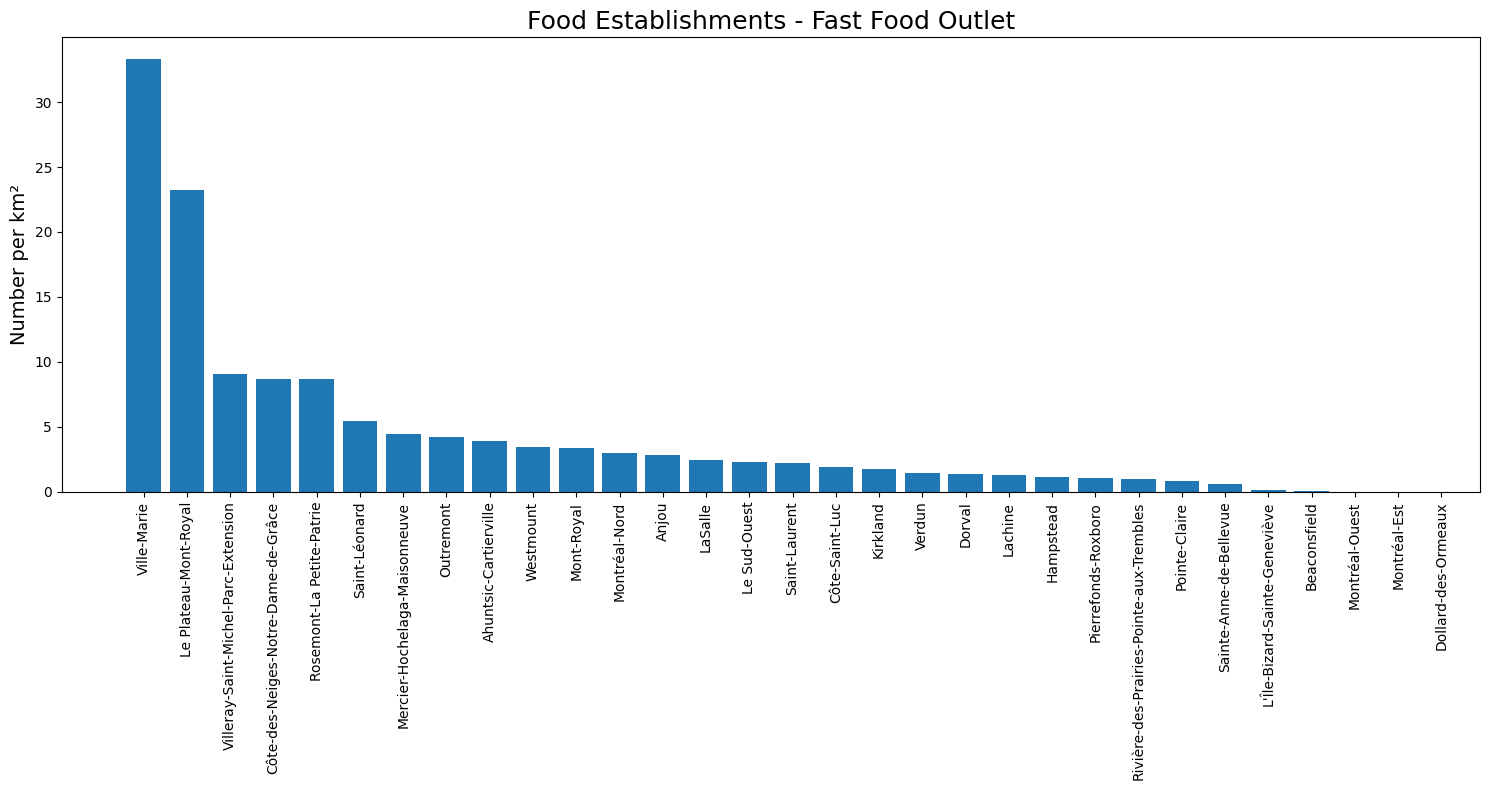

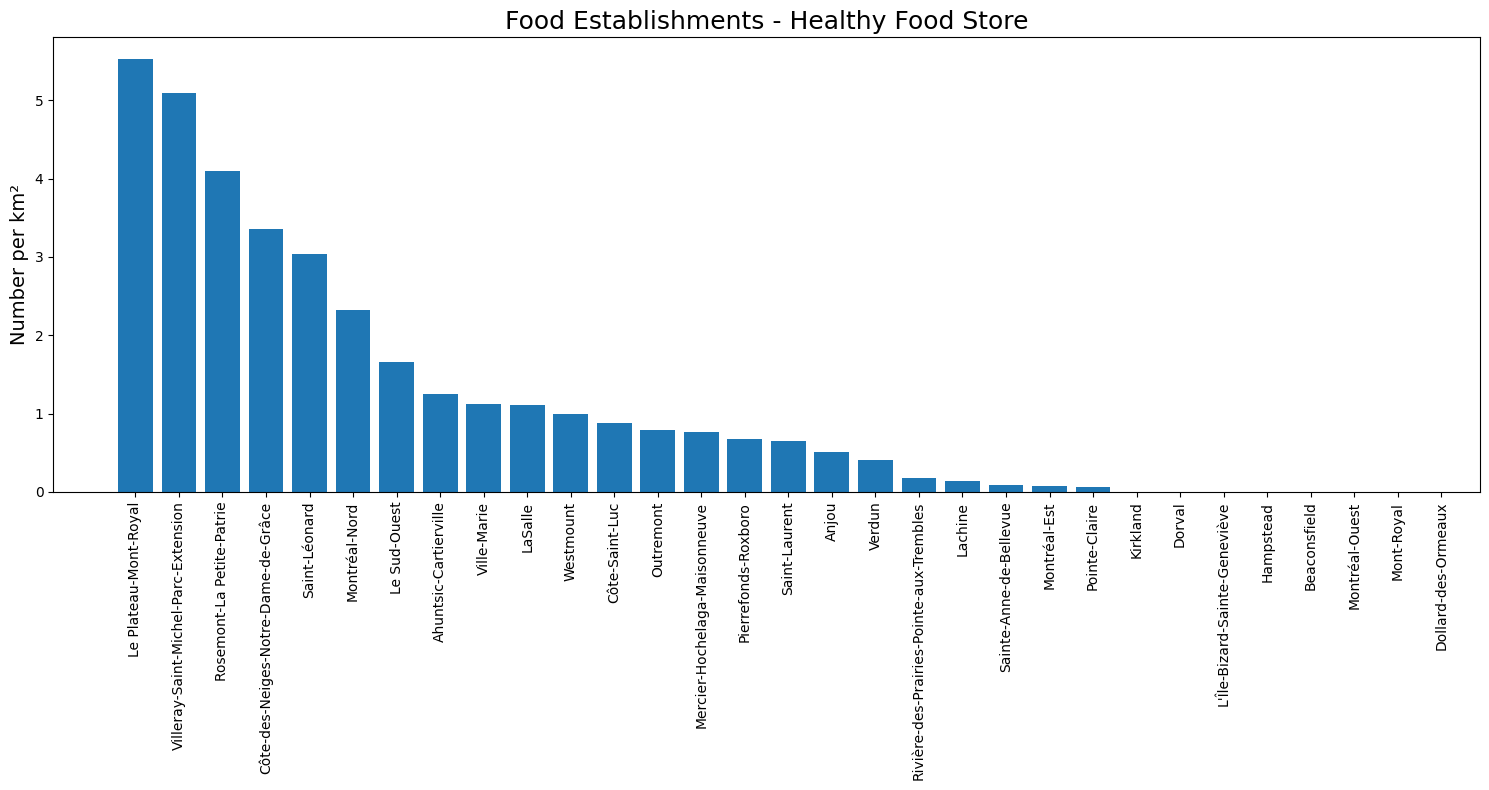

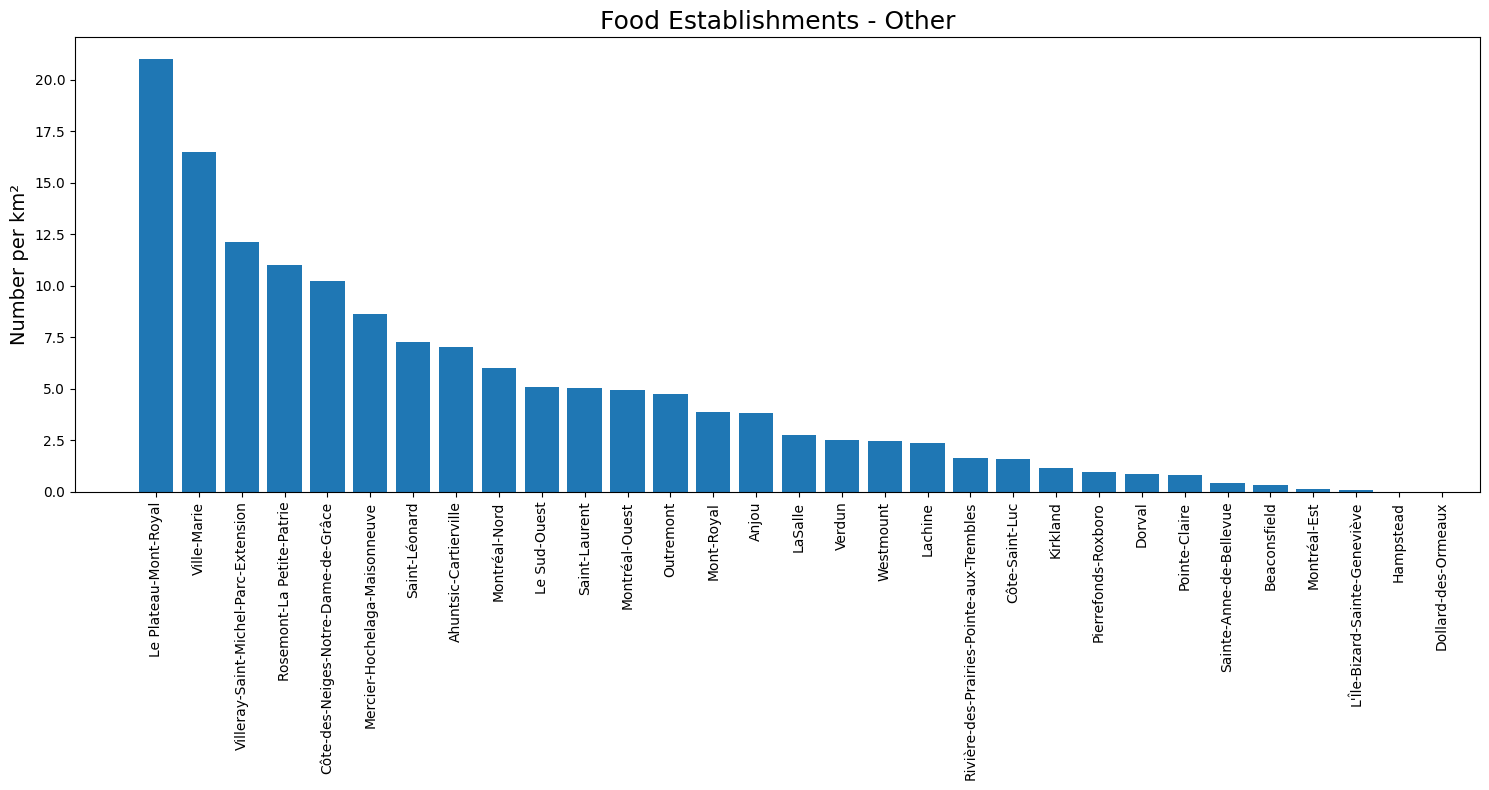

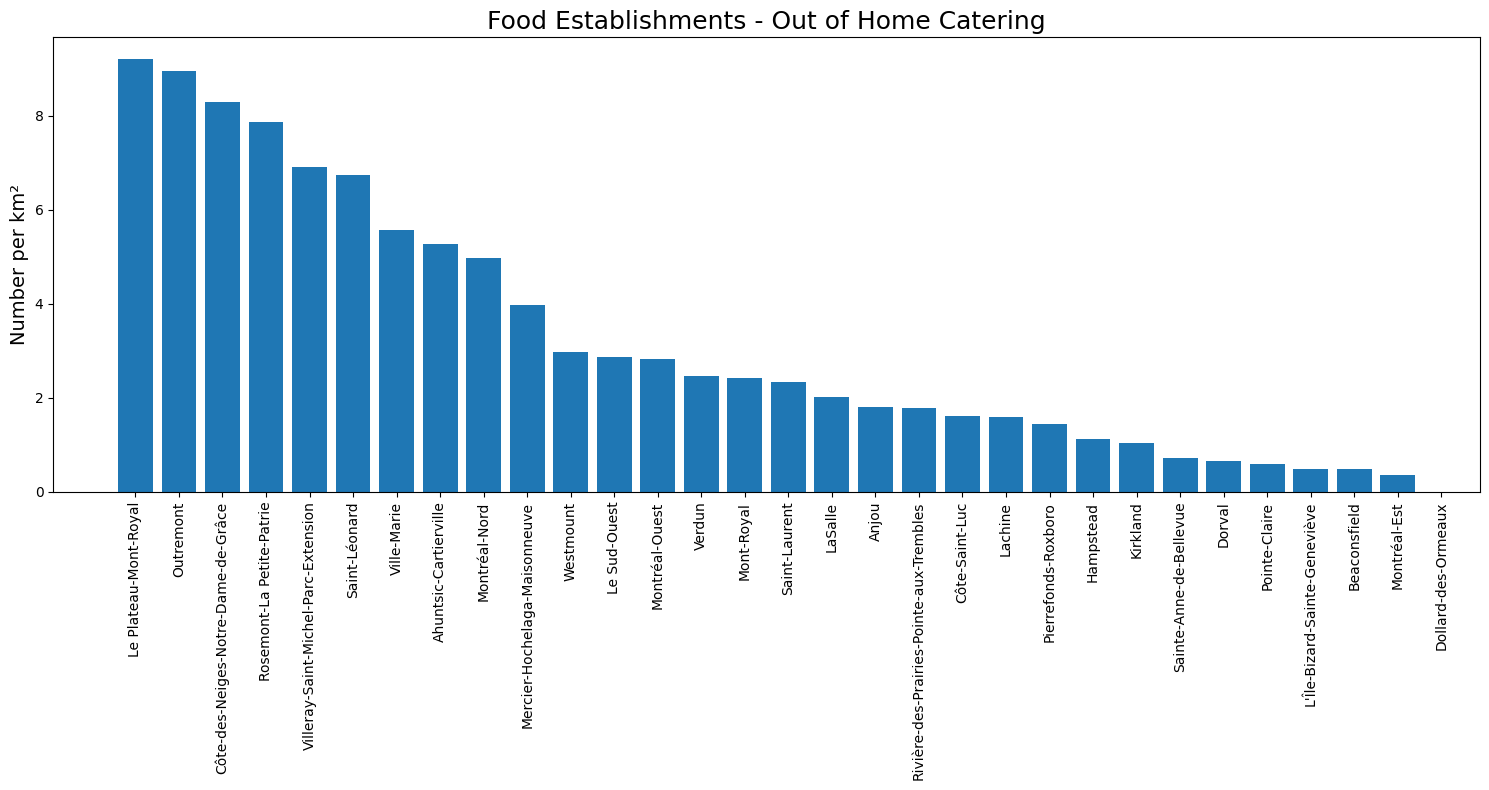

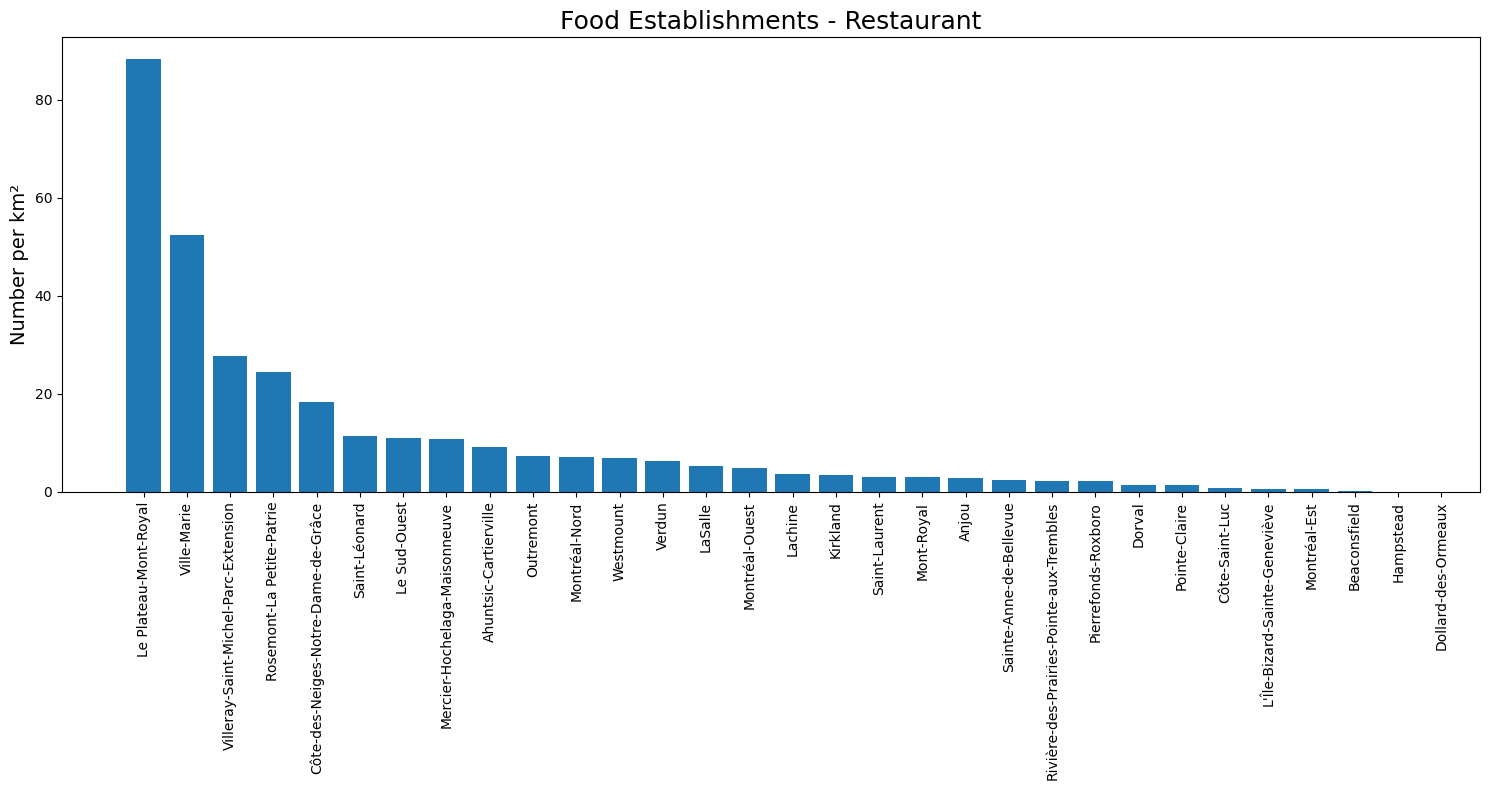

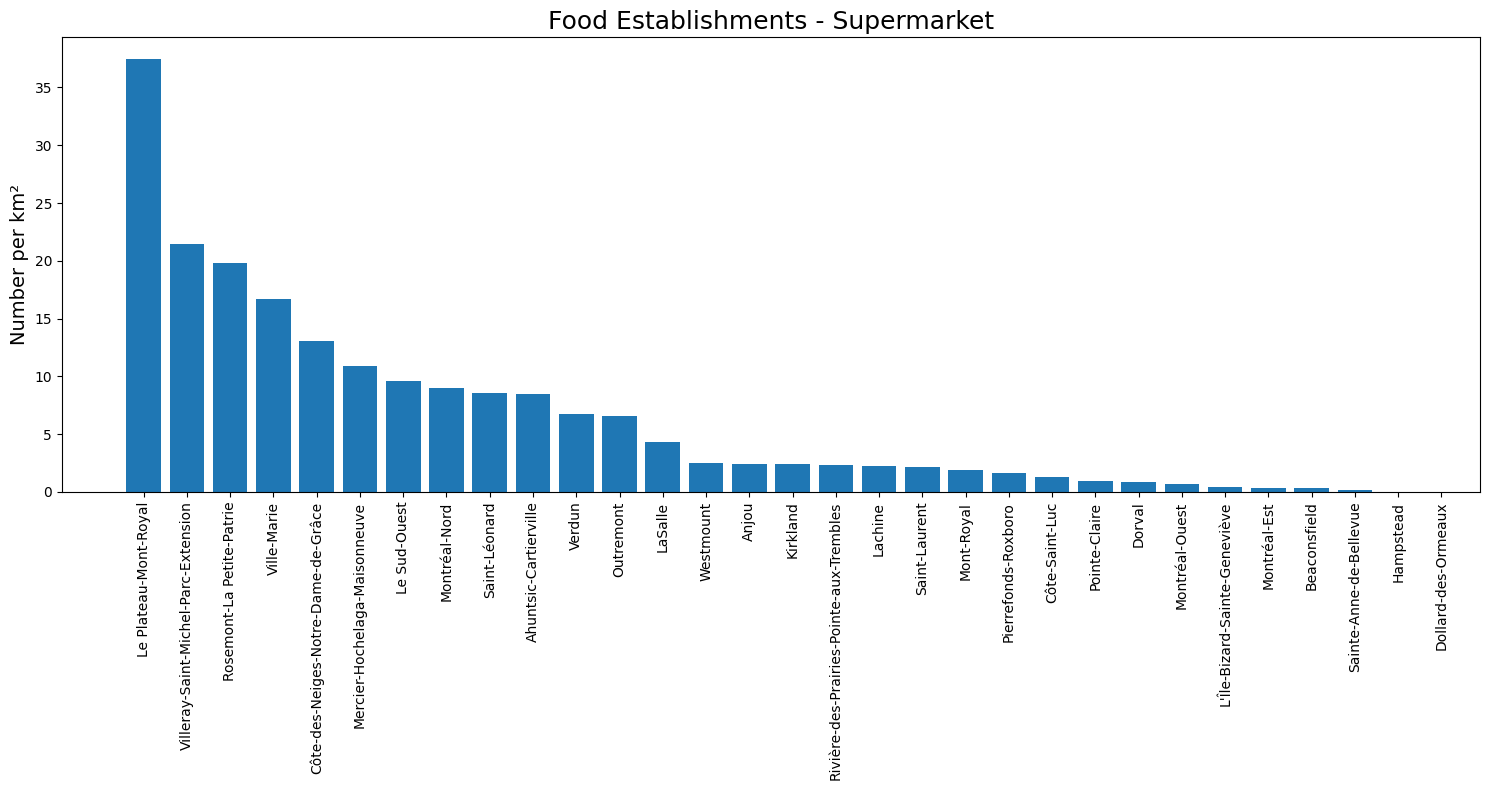

In [30]:
# Selected types of food establishments
types = ['Fast Food Outlet', 'Healthy Food Store', 'Other', 'Out of Home Catering', 'Restaurant', 'Supermarket']

# Data for bar charts
data = gdf[[f"{food_establishments_type}_per_km2" for food_establishments_type in types]].copy()
data['NOM'] = gdf['NOM']  # Include borough names for sorting

# Generate bar charts for each food establishments type
for food_establishments_type in types:
    # Sort data in descending order for the current food establishments type
    sorted_data = data.sort_values(by=f"{food_establishments_type}_per_km2", ascending=False)
    
    # Extract sorted values and labels
    sorted_values = sorted_data[f"{food_establishments_type}_per_km2"]
    sorted_labels = sorted_data['NOM']
    
    # Plot sorted data
    plt.figure(figsize=(15, 8))
    plt.bar(sorted_labels, sorted_values, label=food_establishments_type)
    plt.title(f'Food Establishments - {food_establishments_type}', fontsize=18)
    plt.xlabel('', fontsize=12)
    plt.ylabel(f'Number per km²', fontsize=14)
    plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for better readability
    
    # Ensure layout adjustments to prevent label truncation
    plt.tight_layout()

    # Save the figure in the "Figures" folder
    output_path = os.path.join(output_folder, f'Number of {food_establishments_type}_per_km2.svg')
    plt.savefig(output_path, format='svg', dpi=300)
    plt.show()

<Axes: >

<Figure size 640x480 with 0 Axes>

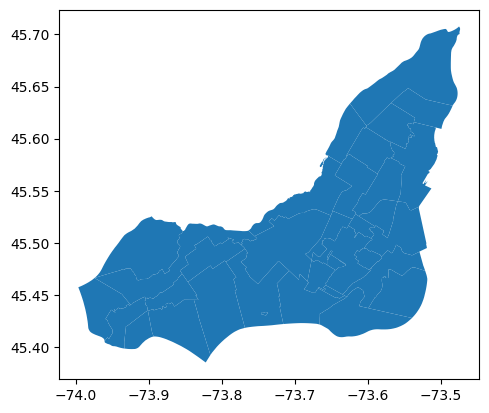

In [31]:
# fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot borough boundaries
boroughs.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

# Highlight boroughs with no data in light grey
no_data_plot = gdf[gdf['geometry'] == None].plot(
    ax=ax, color='lightgrey', label='No Data'
)
boroughs.plot()

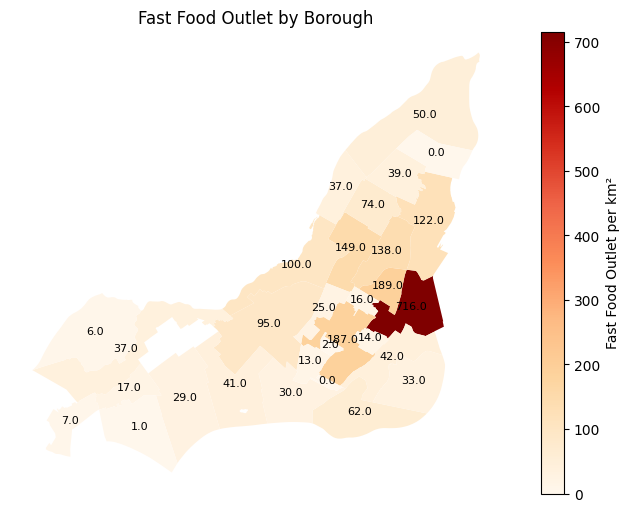

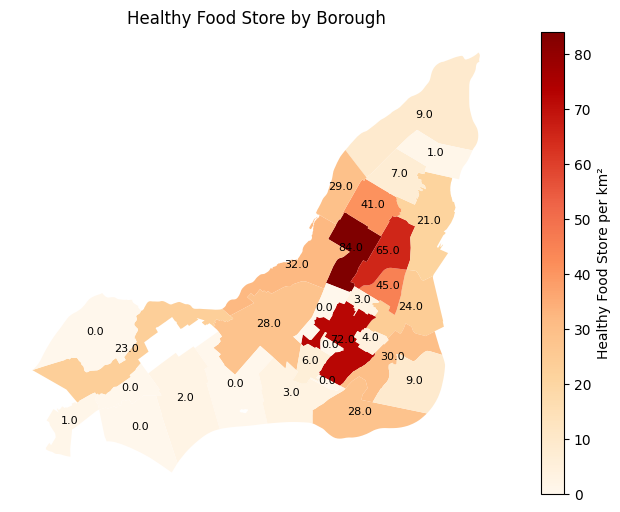

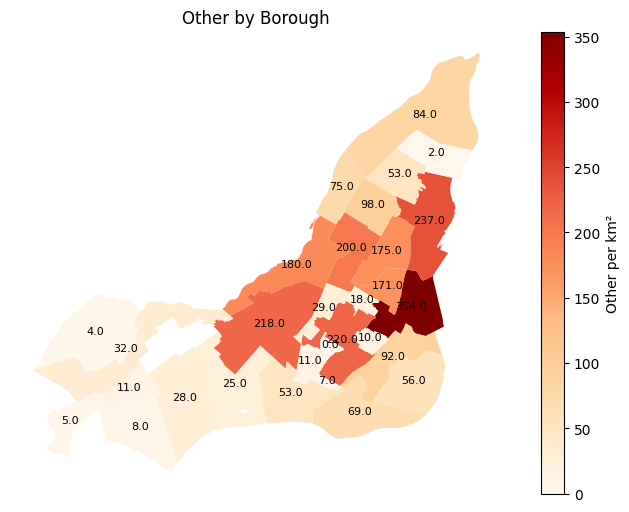

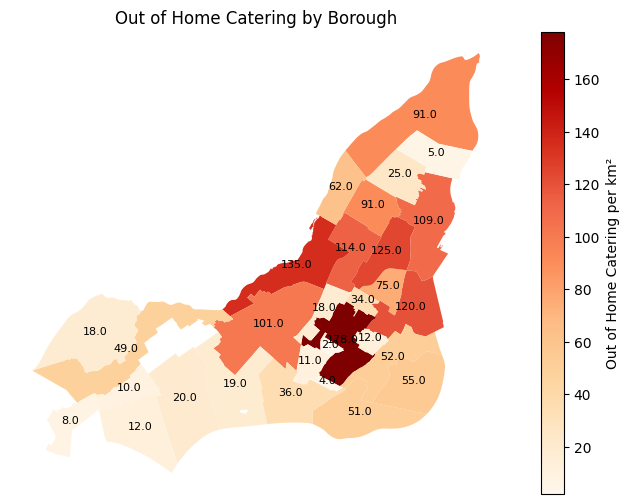

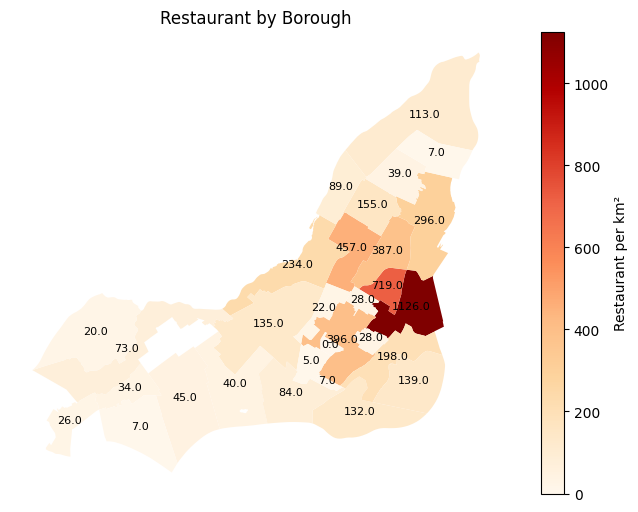

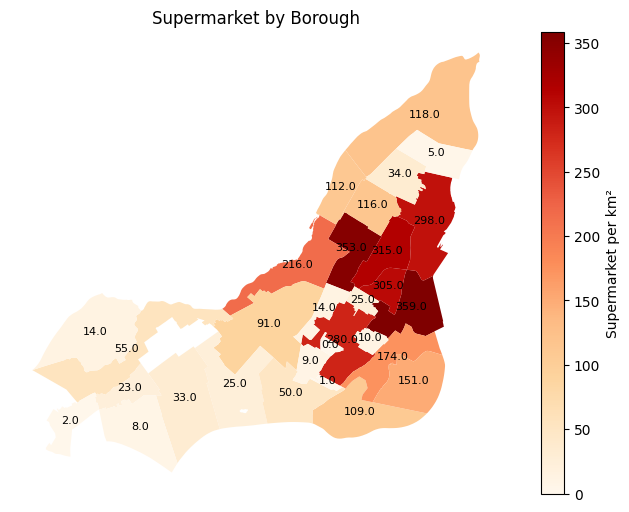

In [32]:
# List of columns to visualize
columns = ['Fast Food Outlet', 'Healthy Food Store', 
           'Other', 'Out of Home Catering', 
           'Restaurant', 'Supermarket']

# Iterate through each column and create a map
for column in columns:
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    # Plot data with valid geometries
    data_with_geometry = gdf[gdf['geometry'].notnull()]
    data_with_geometry.plot(column=column, ax=ax, legend=True, cmap='OrRd', 
                            legend_kwds={'label': f"{column} per km²"})
    
    # Plot "No Data" for rows with missing geometries
    data_without_geometry = gdf[gdf['geometry'].isnull()]
    if not data_without_geometry.empty:
        data_without_geometry.plot(ax=ax, color='lightgrey', label='No Data')
    
    # Add text labels for rows with valid geometries
    for idx, row in data_with_geometry.iterrows():
        centroid = row['geometry'].centroid  # Calculate the centroid of the polygon
        value = row[column]  # Get the value for the column being plotted
        ax.text(
            centroid.x, 
            centroid.y, 
            f"{value:.1f}",  # Format to 1 decimal place
            horizontalalignment='center', 
            fontsize=8, 
            color='black'
        )
    
    # Add title, legend, and hide axes
    ax.set_title(f"{column} by Borough")
    ax.set_axis_off()  # Hide the axis for a cleaner visualization
    # Save the figure in the "Figures" folder
    output_path = os.path.join(output_folder, f'Per_km2_{column}.svg')
    plt.savefig(output_path, format='svg', dpi=300)   
    plt.show()

In [33]:
# merged_geom = gpd.read_file('Data/merged_data_with_age_geom.shp')
merged_geom = boroughs_age

In [34]:
merged_geom.head(5)

,NOM,Number_of_,Area_km2,Weighted_C,Number_o_1,Incidents_,without_re,count,Age,geometry
0,Mercier-Hochelaga-Maisonneuve,1276,27.397994,46.572753,960.0,1.329167,NaN,769.0,46.0,"POLYGON ((611553.115 5050223.963, 611575.051 5..."
1,Rosemont-La Petite-Patrie,1122,15.880220,70.653935,1195.0,0.938912,NaN,873.0,50.0,"POLYGON ((610254.244 5046844.882, 610345.760 5..."
2,Montréal-Nord,1084,12.459161,87.004251,334.0,3.245509,NaN,288.0,43.0,"POLYGON ((608917.076 5051791.226, 608914.518 5..."
3,Villeray-Saint-Michel-Parc-Extension,984,16.475024,59.726772,1075.0,0.915349,NaN,832.0,43.0,"POLYGON ((610254.244 5046844.882, 610318.924 5..."
4,Ahuntsic-Cartierville,865,25.568455,33.830750,1489.0,0.580927,NaN,1334.0,43.0,"POLYGON ((596568.412 5040562.684, 596572.926 5..."


In [35]:
merged_geom = merged_geom.merge(gdf[['NOM', 'Fast Food Outlet_per_km2', 'Healthy Food Store_per_km2', 
                                     'Other_per_km2', 'Out of Home Catering_per_km2', 
                                     'Restaurant_per_km2', 'Supermarket_per_km2']], 
                                 on='NOM', how='left')

In [36]:
merged_geom.head()

,NOM,Number_of_,Area_km2,Weighted_C,Number_o_1,Incidents_,without_re,count,Age,geometry,Fast Food Outlet_per_km2,Healthy Food Store_per_km2,Other_per_km2,Out of Home Catering_per_km2,Restaurant_per_km2,Supermarket_per_km2
0,Mercier-Hochelaga-Maisonneuve,1276,27.397994,46.572753,960.0,1.329167,NaN,769.0,46.0,"POLYGON ((611553.115 5050223.963, 611575.051 5...",4.452881,0.766479,8.650268,3.978394,10.803711,10.876709
1,Rosemont-La Petite-Patrie,1122,15.880220,70.653935,1195.0,0.938912,NaN,873.0,50.0,"POLYGON ((610254.244 5046844.882, 610345.760 5...",8.690056,4.093142,11.019999,7.871428,24.369940,19.835998
2,Montréal-Nord,1084,12.459161,87.004251,334.0,3.245509,NaN,288.0,43.0,"POLYGON ((608917.076 5051791.226, 608914.518 5...",2.969702,2.327604,6.019667,4.976258,7.143338,8.989369
3,Villeray-Saint-Michel-Parc-Extension,984,16.475024,59.726772,1075.0,0.915349,NaN,832.0,43.0,"POLYGON ((610254.244 5046844.882, 610318.924 5...",9.043993,5.098627,12.139588,6.919565,27.738958,21.426373
4,Ahuntsic-Cartierville,865,25.568455,33.830750,1489.0,0.580927,NaN,1334.0,43.0,"POLYGON ((596568.412 5040562.684, 596572.926 5...",3.911069,1.251542,7.039925,5.279944,9.151902,8.447910


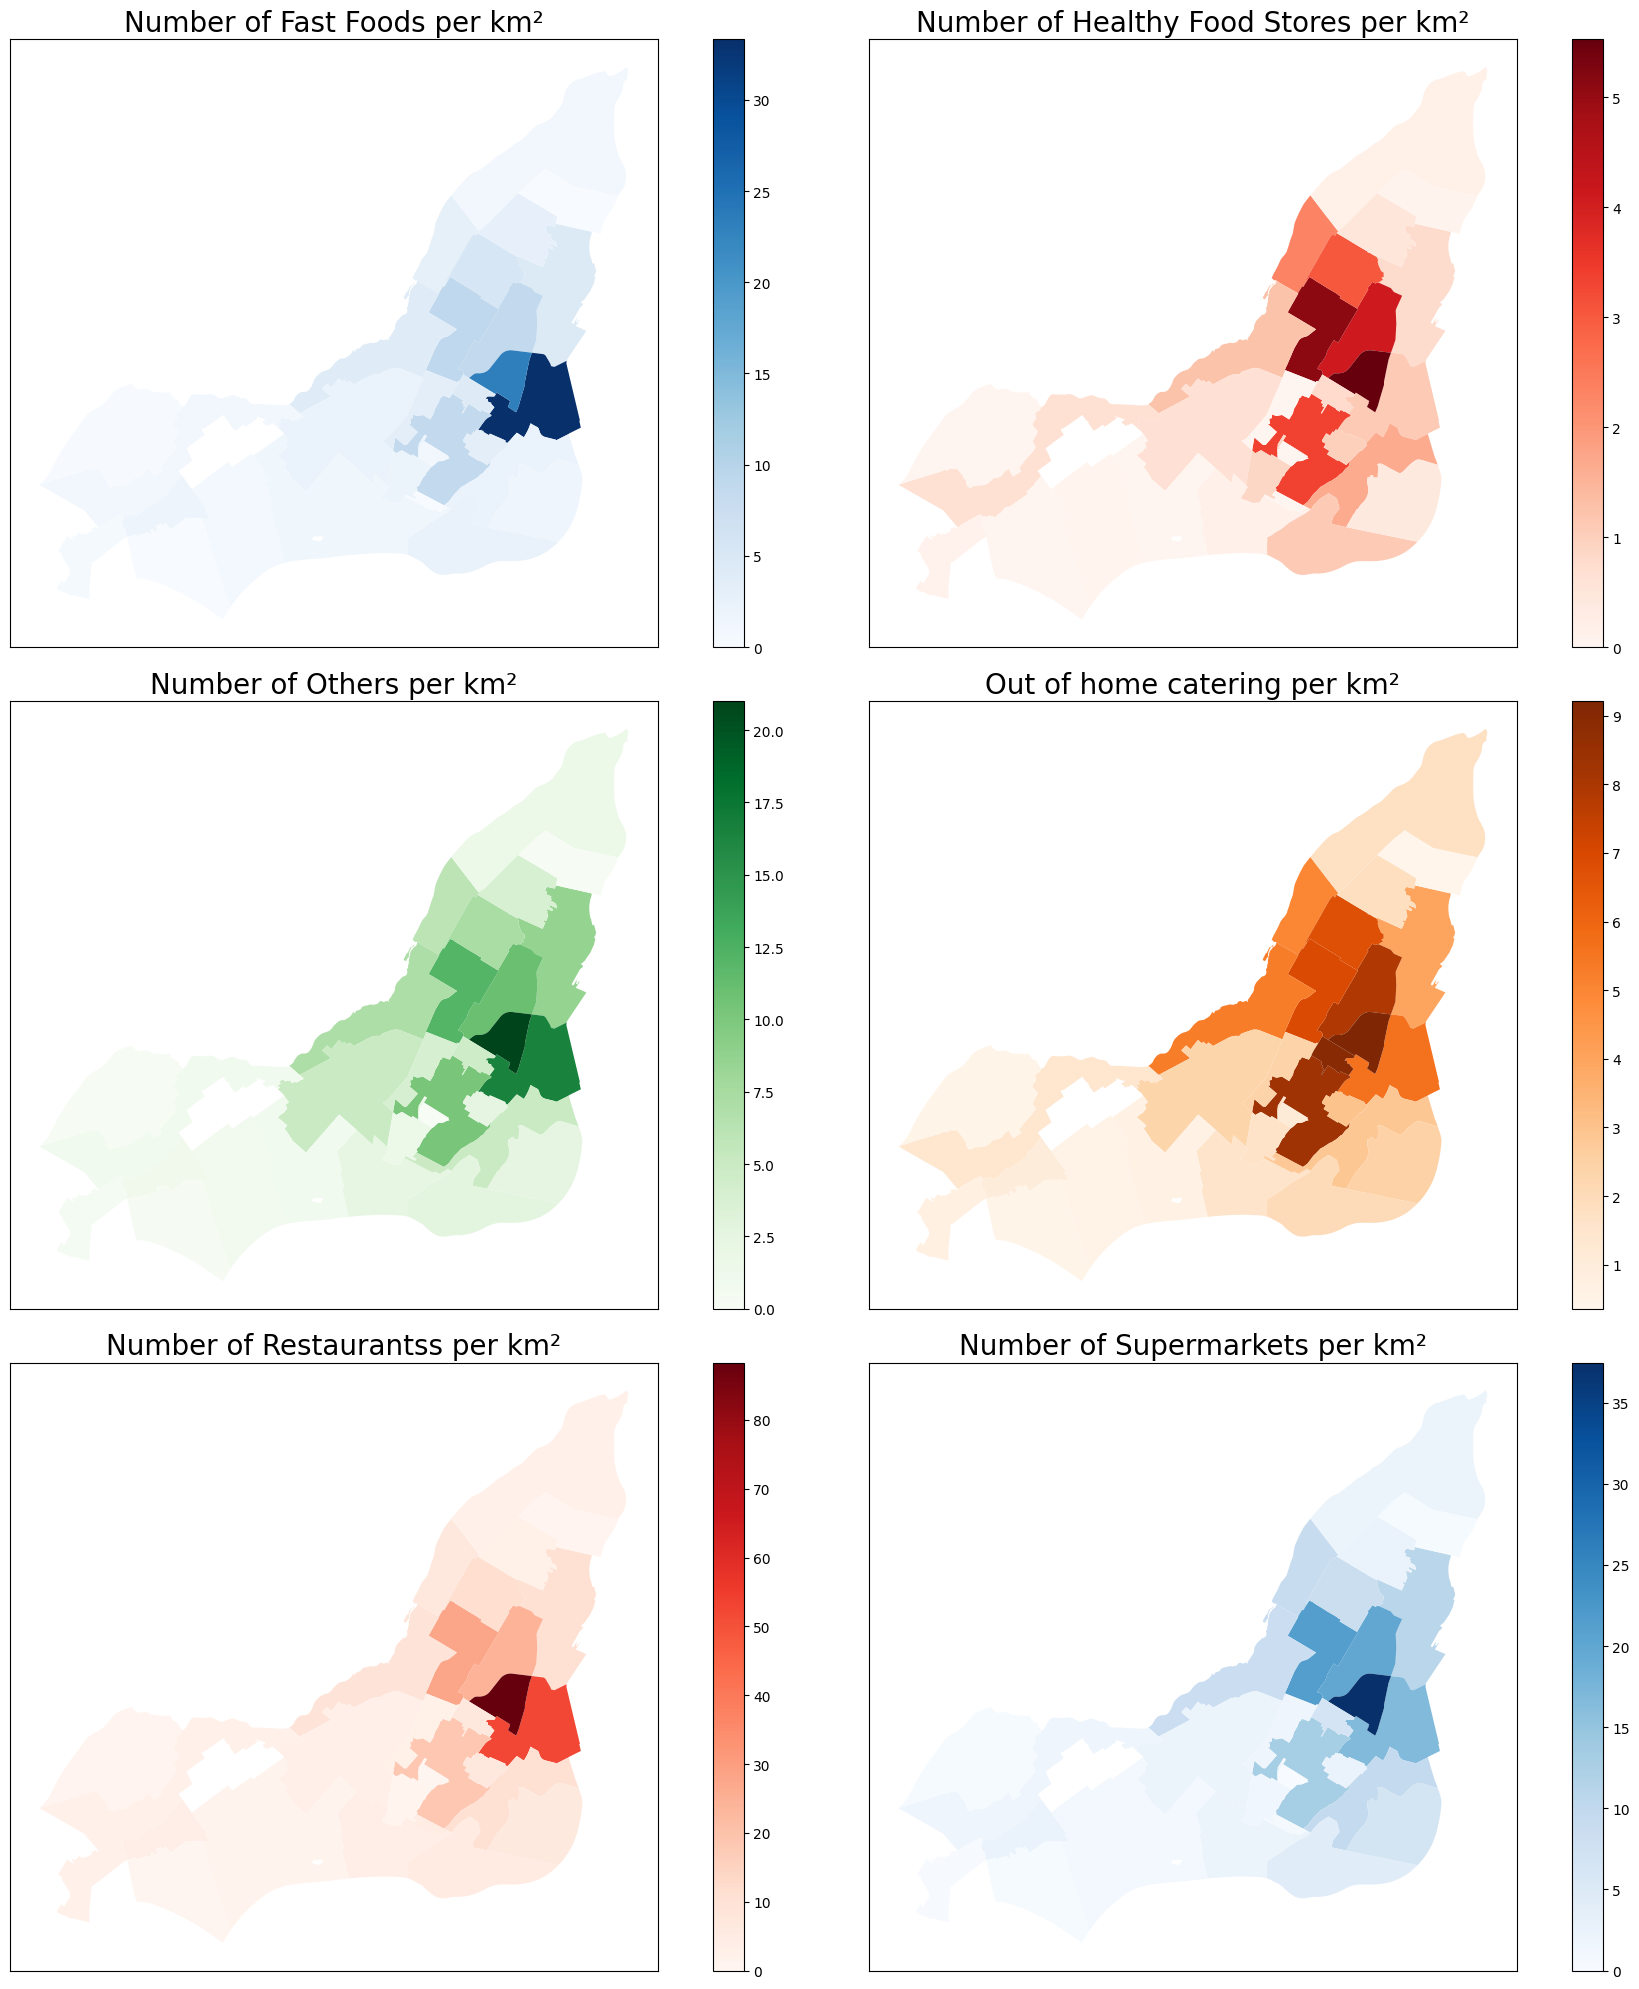

In [37]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))
titlesize = 20

merged_geom.plot(column='Fast Food Outlet_per_km2', cmap='Blues', ax=axs[0, 0], legend=True)
axs[0, 0].set_title('Number of Fast Foods per km²', size=titlesize)

merged_geom.plot(column='Healthy Food Store_per_km2', cmap='Reds', ax=axs[0, 1], legend=True)
axs[0, 1].set_title('Number of Healthy Food Stores per km²', size=titlesize)

merged_geom.plot(column='Other_per_km2', cmap='Greens', ax=axs[1, 0], legend=True)
axs[1, 0].set_title('Number of Others per km²', size=titlesize)

merged_geom.plot(column='Out of Home Catering_per_km2', cmap='Oranges', ax=axs[1, 1], legend=True)
axs[1, 1].set_title('Out of home catering per km²', size=titlesize)

merged_geom.plot(column='Restaurant_per_km2', cmap='Reds', ax=axs[2, 0], legend=True)
axs[2, 0].set_title('Number of Restaurantss per km²', size=titlesize)

merged_geom.plot(column='Supermarket_per_km2', cmap='Blues', ax=axs[2, 1], legend=True)
axs[2, 1].set_title('Number of Supermarkets per km²', size=titlesize)

# Increase the font size for the legend numbers (colorbar tick labels)
# The main subplot axes are in `axs`; the extra Axes (colorbars) are in fig.axes but not in axs.
main_axes = axs.flatten()
for ax in fig.axes:
    if ax not in main_axes:
        ax.tick_params(labelsize=10)  # Increase tick label font size for colorbars

# Loop through all axes to hide x and y ticks
for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

# Increase the spacing between subplots
plt.tight_layout(pad=3.0, w_pad=2.0, h_pad=2.0)
    
plt.tight_layout()

# Save the figure in the "Figures" folder
output_path = os.path.join(output_folder, 'All_Food_Establishments_per_sqkm_3_2.svg')
plt.savefig(output_path, format='svg', dpi=300)   
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(40, 20))
titlesize = 30

merged_geom.plot(column='Fast Food Outlet_per_km2', cmap='Blues', ax=axs[0, 0], legend=True)
axs[0, 0].set_title('Number of Fast Foods per km²', size=titlesize)

merged_geom.plot(column='Healthy Food Store_per_km2', cmap='Reds', ax=axs[0, 1], legend=True)
axs[0, 1].set_title('Number of Healthy Food Stores per km²', size=titlesize)

merged_geom.plot(column='Other_per_km2', cmap='Greens', ax=axs[0, 2], legend=True)
axs[0, 2].set_title('Number of Others per km²', size=titlesize)

merged_geom.plot(column='Out of Home Catering_per_km2', cmap='Oranges', ax=axs[1, 0], legend=True)
axs[1, 0].set_title('Out of home catering per km²', size=titlesize)

merged_geom.plot(column='Restaurant_per_km2', cmap='Reds', ax=axs[1, 1], legend=True)
axs[1, 1].set_title('Number of Restaurants per km²', size=titlesize)

merged_geom.plot(column='Supermarket_per_km2', cmap='Blues', ax=axs[1, 2], legend=True)
axs[1, 2].set_title('Number of Supermarkets per km²', size=titlesize)

# Increase the font size for the legend numbers (colorbar tick labels)
# The main subplot axes are in `axs`; the extra Axes (colorbars) are in fig.axes but not in axs.
main_axes = axs.flatten()
for ax in fig.axes:
    if ax not in main_axes:
        ax.tick_params(labelsize=25)  # Increase tick label font size for colorbars
        
# Loop through all axes to hide x and y ticks
for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

# Increase the spacing between subplots
plt.tight_layout(pad=3.0, w_pad=1.0, h_pad=2.0)

# Alternatively, you can use:
# plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Save the figure in the "Figures" folder
output_path = os.path.join(output_folder, 'All_Food_Establishments_per_sqkm_2_3.svg')
plt.savefig(output_path, format='svg', dpi=300)
plt.show()
